In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df['average_score'] = (df['math score']+df['reading score']+df['writing score'])/3
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

In [9]:
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course','math score', 'reading score', 'writing score']]
Y = df['pass']

In [15]:
X_encoded= pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded,Y,test_size=0.3,random_state=100)

Decision tree

In [17]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training data:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on testing data:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training data:0.997
Accuracy on testing data:0.973


In [18]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.14014405 0.05396721 0.80588874 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


Text(0, 0.5, 'Feature')

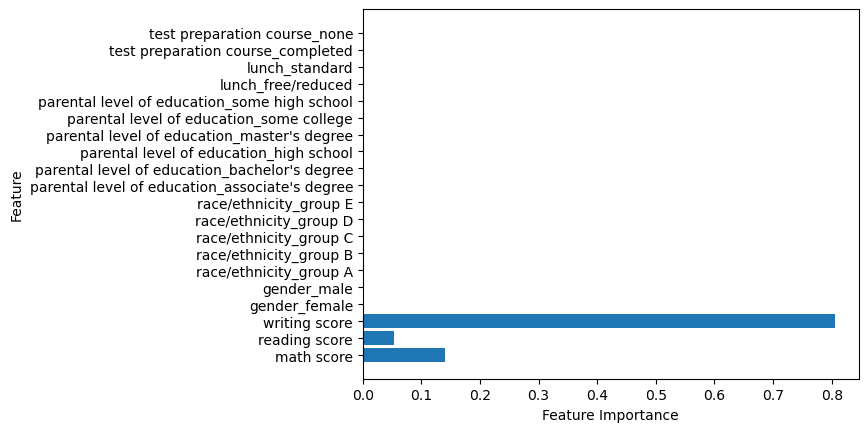

In [23]:
n_features = X_train.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),  X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [24]:
y_pred = tree.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 19   4]
 [  4 273]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.99      0.99      0.99       277

    accuracy                           0.97       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.97      0.97      0.97       300



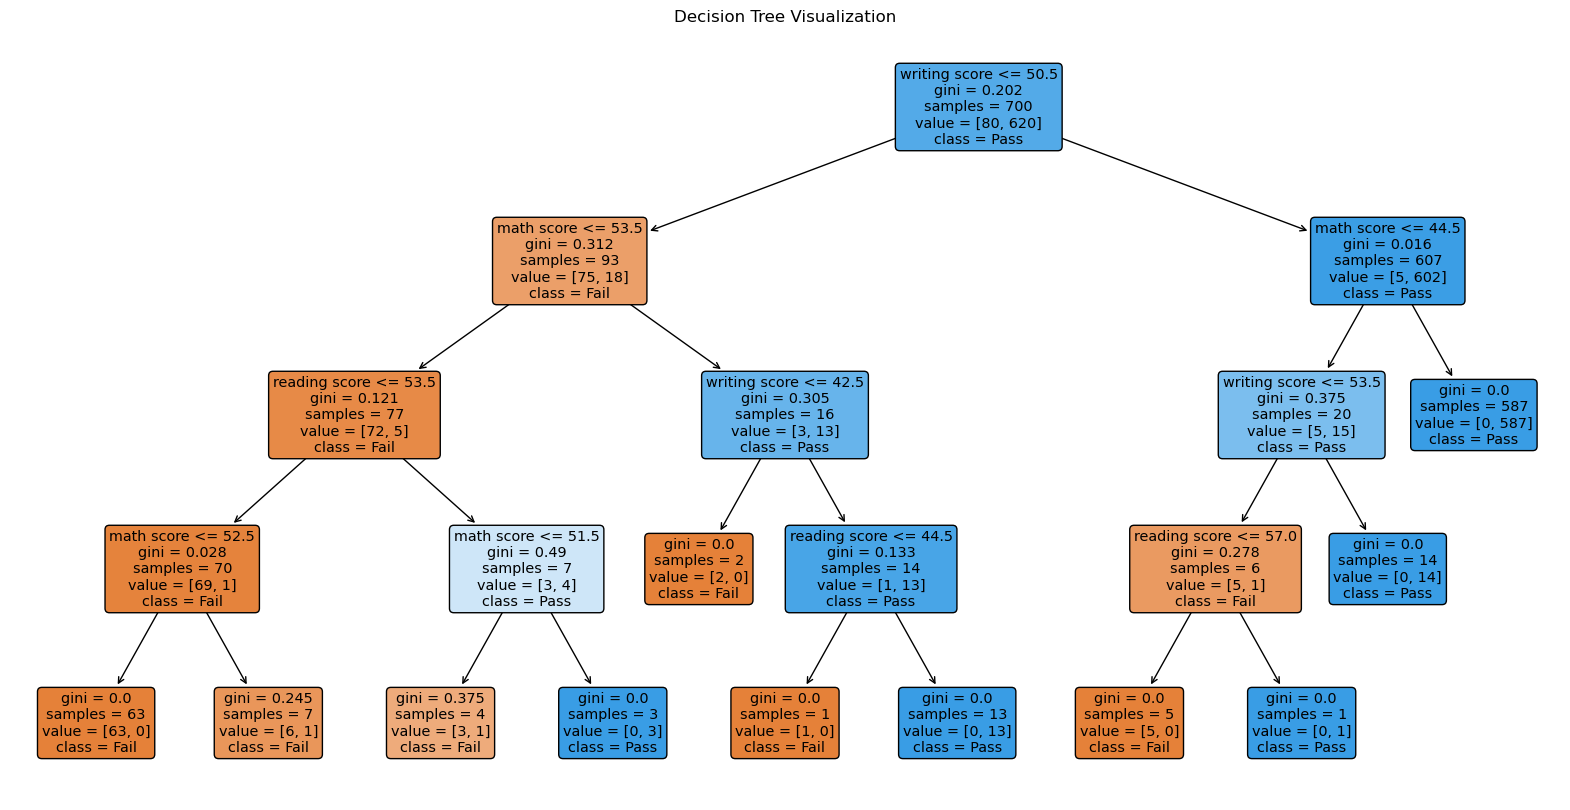

In [31]:
plt.figure(figsize=(20,10))  # Adjust size as needed
plot_tree(tree, 
          feature_names=X_train.columns, 
          class_names=["Fail", "Pass"], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
Logistic Regression

In [28]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("LogReg Test Accuracy:", log_reg.score(X_test, y_test))

LogReg Test Accuracy: 1.0


In [29]:
y_pred = log_reg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 23   0]
 [  0 277]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       277

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



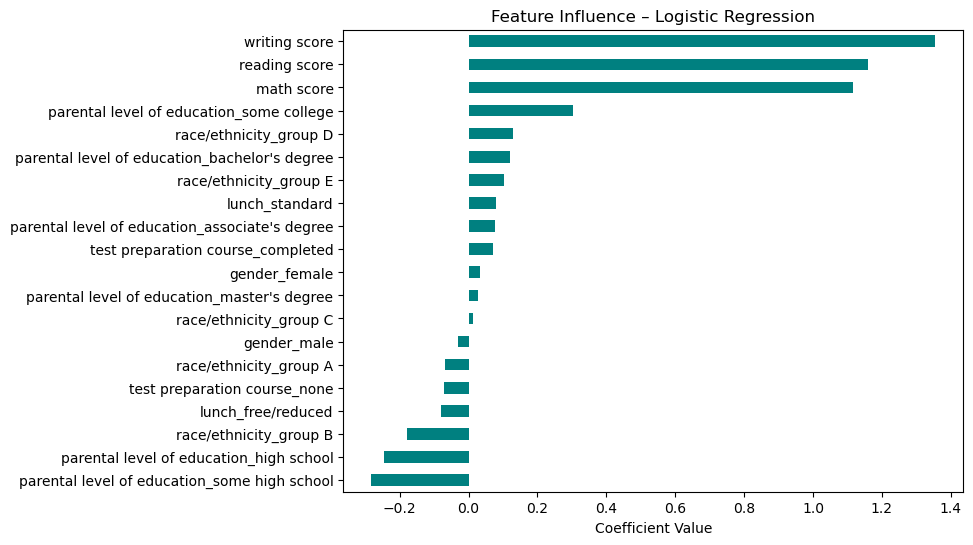

In [32]:
coefficients = pd.Series(log_reg.coef_[0], index=X_train.columns)
coefficients.sort_values().plot(kind='barh', figsize=(8,6), color='teal')
plt.title("Feature Influence – Logistic Regression")
plt.xlabel("Coefficient Value")
plt.show()

The Logistic Regression model achieved 100% accuracy on the test set. This suggests the features provided have strong predictive power. Further experiments with cross-validation and noise injection could confirm model robustness.